In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import re

C:\Users\duyph\AppData\Local\Temp\ipykernel_19476\3038280894.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


### 1. Load data
- Load file `superstore_dataset_dashboarddesign_clean.csv` vào biến `df`

In [6]:
# Get data path & data name
data_path = 'C:\\Users\\duyph\\Documents\\DAP2308R1\\data\\'
data_name = 'superstore_dataset_dashboarddesign_clean.csv'


In [5]:
# Load data to Pandas object
df = pd.read_csv(data_path + data_name, encoding = 'unicode_escape')

### 2. Inspect data

- Show 3 dòng đầu

In [7]:
df.head(3)

,Order Date,Order ID,Product Name,Category,City,Country,Customer Name,Discount,Postal Code,Manufacturer,Profit,Profit Ratio,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,11/8/2017,CA-2017-152156,Bush Somerset Collection Bookcase,Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Bush,42.0,0.16,2.0,South,262.0,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,11/8/2017,CA-2017-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Hon,220.0,0.30,3.0,South,732.0,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,6/12/2017,CA-2017-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.0,90036.0,Universal,7.0,0.47,2.0,West,15.0,Corporate,6/16/2017,Second Class,California,Labels


- Show 3 dòng cuối

In [8]:
df.tail(3)

,Order Date,Order ID,Product Name,Category,City,Country,Customer Name,Discount,Postal Code,Manufacturer,Profit,Profit Ratio,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
9991,6/6/2017,CA-2017-160717,Samsung Galaxy Mega 6.3,Technology,Santa Barbara,United States,Maria Etezadi,0.2,93101.0,Samsung,227.0,0.08,9.0,West,3024.0,Home Office,6/11/2017,Standard Class,California,Phones
9992,10/16/2018,CA-2018-159282,Swingline SM12-08 MicroCut Jam Free Shredder,Technology,Yuma,United States,Gary Hansen,0.7,85364.0,Other,-480.0,-0.80,5.0,West,600.0,Home Office,10/21/2018,Standard Class,Arizona,Machines
9993,4/17/2018,CA-2018-134845,Lexmark MX611dhe Monochrome Laser Printer,Technology,Louisville,United States,Sharelle Roach,0.7,80027.0,Other,-3400.0,-1.33,5.0,West,2550.0,Home Office,4/23/2018,Standard Class,Colorado,Machines


- Data có bao nhiêu dòng, bao nhiêu cột?

In [253]:
print("Data có" +" " + str(df.shape[0]) + " "+ "hàng, " + str(df.shape[1]) + " " + "cột")

Data có 9994 hàng, 25 cột


- In ra list tên các cột

In [13]:
df.columns.tolist()

['Order Date',
 'Order ID',
 'Product Name',
 'Category',
 'City',
 'Country',
 'Customer Name',
 'Discount',
 'Postal Code',
 'Manufacturer',
 'Profit',
 'Profit Ratio',
 'Quantity',
 'Region',
 'Sales',
 'Segment',
 'Ship Date',
 'Ship Mode',
 'State',
 'Sub-Category']

- Kiểu dữ liệu của từng cột

In [14]:
df.dtypes

Order Date        object
Order ID          object
Product Name      object
Category          object
City              object
Country           object
Customer Name     object
Discount         float64
Postal Code      float64
Manufacturer      object
Profit           float64
Profit Ratio     float64
Quantity         float64
Region            object
Sales            float64
Segment           object
Ship Date         object
Ship Mode         object
State             object
Sub-Category      object
dtype: object

### 3. Transform cột

####  3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [255]:
new_cols = []
for i in df.columns.tolist():
    new_cols += [re.sub('[ -]', '_', i).strip().lower()]
new_cols

['order_date',
 'order_id',
 'product_name',
 'category',
 'city',
 'country',
 'customer_name',
 'discount',
 'postal_code',
 'manufacturer',
 'profit',
 'profit_ratio',
 'quantity',
 'region',
 'sales',
 'segment',
 'ship_date',
 'ship_mode',
 'state',
 'sub_category',
 'order_year',
 'order_day',
 'order_month',
 'ship_day',
 'delay_day']

In [16]:
new_cols = [re.sub('[ ]','_',_).lower() for _ in df.columns.tolist()] # List comprehension
df.columns = new_cols

- In ra 1 dòng đầu để kiểm tra

In [17]:
df.head(1)

,order_date,order_id,product_name,category,city,country,customer_name,discount,postal_code,manufacturer,profit,profit_ratio,quantity,region,sales,segment,ship_date,ship_mode,state,sub-category
0,11/8/2017,CA-2017-152156,Bush Somerset Collection Bookcase,Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Bush,42.0,0.16,2.0,South,262.0,Consumer,11/11/2017,Second Class,Kentucky,Bookcases


#### Tại sao phải chuyển tên cột về dạng "snake_case"?

1. Độ nhất quán và dễ đọc: "snake_case" giúp tên cột trở nên dễ đọc hơn và dễ hiểu hơn bởi vì các từ được phân tách bằng dấu gạch dưới (_) thay vì viết hoa chữ cái đầu. Điều này giúp các từ trong tên cột trở nên rõ ràng hơn và giảm khả năng nhầm lẫn.

2. Tương thích với nhiều ngôn ngữ và công cụ: Chuẩn "snake_case" phù hợp với nhiều ngôn ngữ lập trình và công cụ xử lý dữ liệu. Khi bạn chia sẻ dữ liệu với người khác hoặc làm việc với nhiều công cụ khác nhau, việc sử dụng chuẩn này giúp tránh sự bất tiện trong việc chuyển đổi tên cột.

3. Tích hợp với các hệ thống và cơ sở dữ liệu: Nhiều hệ thống và cơ sở dữ liệu yêu cầu tên cột trong dạng "snake_case". Khi bạn làm việc với các hệ thống này, việc sử dụng "snake_case" có thể giảm thiểu cần phải chuyển đổi tên cột khi nhập hoặc xuất dữ liệu. Trong SQL, việc lưu data với tên cột chứa khoảng trắng gây ra một số phiền hà không cần thiết (như phải thêm "" khi chọn tên cột trong câu lệnh SELECT)

4. Dễ dàng khi làm việc với mã code và biến: Nếu bạn cần sử dụng dữ liệu trong mã code Python, "snake_case" thường phù hợp hơn vì việc gọi tên biến và tên cột sẽ dễ dàng hơn. Các tên biến trong Python thường được viết bằng chữ thường và phân tách bằng dấu gạch dưới.

#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [25]:
df.dtypes

order_date        object
order_id          object
product_name      object
category          object
city              object
country           object
customer_name     object
discount         float64
postal_code      float64
manufacturer      object
profit           float64
profit_ratio     float64
quantity         float64
region            object
sales            float64
segment           object
ship_date         object
ship_mode         object
state             object
sub-category      object
dtype: object

In [35]:
display(df['order_date'])
display(df['ship_date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: order_date, Length: 9994, dtype: datetime64[ns]

0       11/11/2017
1       11/11/2017
2        6/16/2017
3       10/18/2016
4       10/18/2016
           ...    
9989    12/29/2015
9990     7/16/2015
9991     6/11/2017
9992    10/21/2018
9993     4/23/2018
Name: ship_date, Length: 9994, dtype: object

- Nếu chưa ở dạng datetime thì đổi thành datetime. Nếu đã ở dạng datetime thì vẫn cứ đổi lại để practice.

In [36]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

- Kiểm tra kết quả sau khi đổi

In [37]:
display(df['order_date'])
display(df['ship_date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: order_date, Length: 9994, dtype: datetime64[ns]

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9989   2015-12-29
9990   2015-07-16
9991   2017-06-11
9992   2018-10-21
9993   2018-04-23
Name: ship_date, Length: 9994, dtype: datetime64[ns]

### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

In [257]:
print( "Có {} nước".format(df['country'].nunique()))

Có 1 nước


In [259]:
print( "Là {}".format(df['country'].unique()))

Là ['United States']


- Có bao nhiêu categories và là những categories nào?

In [262]:
print( "Có {} categories".format(df['category'].nunique()))

Có 3 categories


In [269]:
print('Bao gồm: '+', '.join(str(i) for i in df['category'].unique()))

Bao gồm: Furniture, Office Supplies, Technology


- Có bao nhiêu subcategories và là những subcategories nào?

In [48]:
df['sub-category'].nunique()

17

In [270]:
print('Bao gồm: '+', '.join(str(i) for i in df['sub-category'].unique()))

Bao gồm: Bookcases, Chairs, Labels, Tables, Storage, Furnishings, Art, Phones, Binders, Appliances, Paper, Accessories, Envelopes, Fasteners, Supplies, Machines, Copiers


- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment` (gợi ý dùng `for`)

In [277]:
check_list = ['city', 'region', 'state', 'ship_mode', 'segment']
for i in check_list:
    num = df[i].nunique()
    name_list = df[i].unique().tolist()
    name = ', '.join(str(_) for _ in name_list)
    print("Bảng {} có {} {}, bao gồm: {}".format(i, num, i, name))

Bảng city có 531 city, bao gồm: Henderson, Los Angeles, Fort Lauderdale, Concord, Seattle, Fort Worth, Madison, West Jordan, San Francisco, Fremont, Philadelphia, Orem, Houston, Richardson, Naperville, Melbourne, Eagan, Westland, Dover, New Albany, New York City, Troy, Chicago, Gilbert, Springfield, Jackson, Memphis, Decatur, Durham, Columbia, Rochester, Minneapolis, Portland, Saint Paul, Aurora, Charlotte, Orland Park, Urbandale, Columbus, Bristol, Wilmington, Bloomington, Phoenix, Roseville, Independence, Pasadena, Newark, Franklin, Scottsdale, San Jose, Edmond, Carlsbad, San Antonio, Monroe, Fairfield, Grand Prairie, Redlands, Hamilton, Westfield, Akron, Denver, Dallas, Whittier, Saginaw, Medina, Dublin, Detroit, Tampa, Santa Clara, Lakeville, San Diego, Brentwood, Chapel Hill, Morristown, Cincinnati, Inglewood, Tamarac, Colorado Springs, Belleville, Taylor, Lakewood, Arlington, Arvada, Hackensack, Saint Petersburg, Long Beach, Hesperia, Murfreesboro, Layton, Austin, Lowell, Manches

#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [281]:
df['order_year'] = df['order_date'].dt.year
df['order_day'] = df['order_date'].dt.day
df['order_month'] = df['order_date'].dt.month

In [297]:
start_time = df['order_date'].min().strftime('%d - %m - %Y')
end_time = df['order_date'].max().strftime('%d - %m - %Y')

In [298]:
print("Data chứ các order trong khoảng thời gian từ {} đến {}". format(start_time, end_time))

Data chứ các order trong khoảng thời gian từ 03 - 01 - 2015 đến 30 - 12 - 2018


- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

In [306]:
df.groupby(['order_year'])['order_id'].count()

order_year
2015    1993
2016    2102
2017    2587
2018    3312
Name: order_id, dtype: int64

In [313]:
order_total_list = {}
for _ in sorted(df['order_year'].unique().tolist()):
    cond = df['order_year'] == _
    order_total_list[_] = df.loc[cond,:]['order_id'].nunique()
    print('{} {}'.format(_, df.loc[cond,:]['order_id'].nunique()))

2015 969
2016 1038
2017 1315
2018 1687


In [314]:
df2 = pd.DataFrame(list(order_total_list.items()),columns=['year', 'order_total'])
df2

,year,order_total
0,2015,969
1,2016,1038
2,2017,1315
3,2018,1687


- Vẽ đồ thị cho thống kê trên

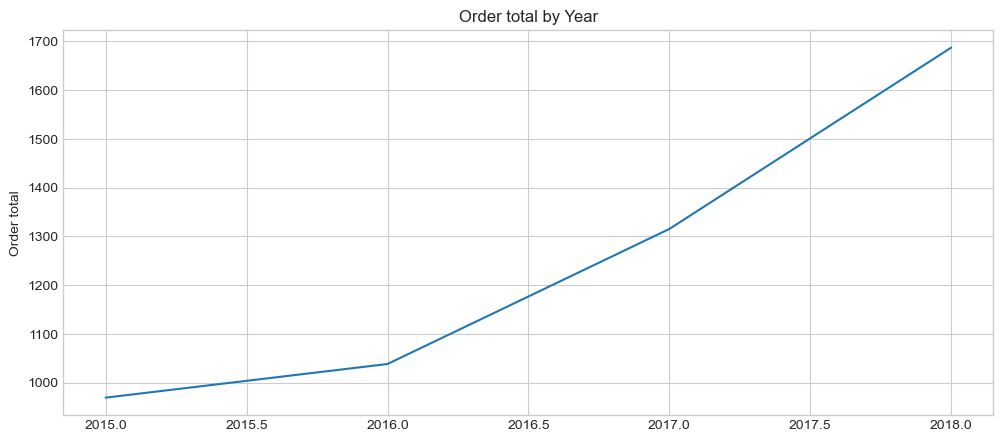

In [315]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(
    x="year", 
    y="order_total",
    data = df2,
    ax=ax
)

ax.set_title("Order total by Year")
ax.set_xlabel(None)
ax.set_ylabel('Order total')

plt.show()

- Mỗi tháng có bao nhiêu order?

In [322]:
order_total_list_by_month = {}
order_total_list_by_month[i] = order_total
year_month_order = df.groupby(['order_year', 'order_month'])['order_id'].nunique().reset_index()
year_month_order.pivot(index = "order_year", columns = "order_month", values = "order_id")

order_month,1,2,3,4,5,6,7,8,9,10,11,12
order_year,,,,,,,,,,,,
2015,32,28,71,66,69,66,65,72,130,78,151,141
2016,29,36,79,72,74,68,66,68,140,87,158,161
2017,48,45,86,89,108,97,96,90,192,105,183,176
2018,69,53,118,116,118,133,111,111,226,147,261,224


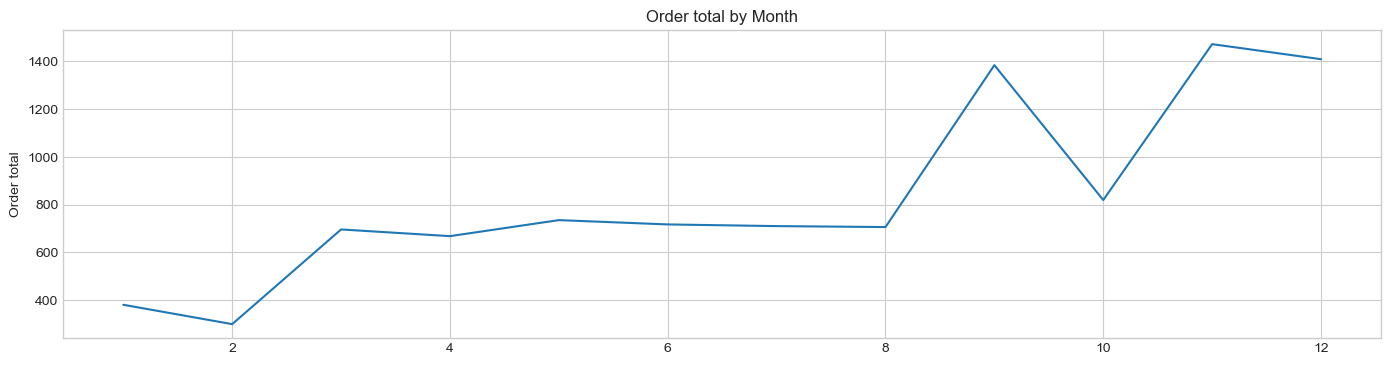

In [152]:
fig, ax = plt.subplots(figsize=(17, 4))

sns.lineplot(
    x="month", 
    y="order_total",
    data = df3,
    ax=ax
)

ax.set_title("Order total by Month")
ax.set_xlabel(None)
ax.set_ylabel('Order total')

plt.show()

### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

In [156]:
df4 = (df.loc[(df["order_year"]) == 2017, :])

- Có bao nhiêu đơn hàng?

In [158]:
df4['order_id'].nunique()

1315

- Số đơn hàng mỗi tháng?

In [171]:
df4_month = df4['order_month'].unique().tolist()
s_df4_month = sorted(df4_month)
df4_dict = {}
for i in s_df4_month:
    df4_dict[i] = (df4.loc[(df["order_month"]) == i, :])['order_id'].nunique()
df4_dtf = pd.DataFrame(list(df4_dict.items()), columns = ['month', ' order'])
df4_dtf

,month,order
0,1,48
1,2,45
2,3,86
3,4,89
4,5,108
5,6,97
6,7,96
7,8,90
8,9,192
9,10,105


- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

In [235]:
df4_sorted = df4.sort_values('sales', ascending = False).reset_index()

In [238]:
df4_sorted.drop_duplicates(subset='product_name')[['product_name', 'sales']].head(10)

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,17500.0
1,GBC Ibimaster 500 Manual ProClick Binding System,9893.0
2,"3D Systems Cube Printer, 2nd Generation, Magenta",9100.0
3,HP Designjet T520 Inkjet Large Format Printer ...,8750.0
5,Hewlett Packard LaserJet 3310 Copier,5400.0
6,High Speed Automatic Electric Letter Opener,4913.0
7,Ativa V4110MDD Micro-Cut Shredder,4900.0
8,Ibico EPK-21 Electric Binding System,4536.0
9,Cubify CubeX 3D Printer Double Head Print,4500.0
10,Okidata MB760 Printer,4477.0


- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

In [233]:
df4_sub_cate = df4_sorted.drop_duplicates(subset='sub-category').reset_index()

In [234]:
df4_sub_cate[['sub-category', 'sales']].head(5)

,sub-category,sales
0,Copiers,17500.0
1,Binders,9893.0
2,Machines,9100.0
3,Supplies,4913.0
4,Phones,4159.0


- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

In [212]:
df['ship_day'] = df['ship_date'].dt.day
df['delay_day'] = df['ship_day'] - df['order_day']

In [330]:
df5 = df.loc[(df['delay_day'] > 3),:].reset_index()
df5[['order_date', 'order_id', 'ship_date','delay_day']].head(10)

,order_date,order_id,ship_date,delay_day
0,2017-06-12,CA-2017-138688,2017-06-16,4
1,2016-10-11,US-2016-108966,2016-10-18,7
2,2016-10-11,US-2016-108966,2016-10-18,7
3,2015-06-09,CA-2015-115812,2015-06-14,5
4,2015-06-09,CA-2015-115812,2015-06-14,5
5,2015-06-09,CA-2015-115812,2015-06-14,5
6,2015-06-09,CA-2015-115812,2015-06-14,5
7,2015-06-09,CA-2015-115812,2015-06-14,5
8,2015-06-09,CA-2015-115812,2015-06-14,5
9,2015-06-09,CA-2015-115812,2015-06-14,5


- Có bao nhiêu đơn như vậy

In [328]:
print("Có {} đơn hàng như vậy.".format(df5['order_id'].nunique()))

Có 2871 đơn hàng như vậy.


- Đơn hàng trễ nhất là bao lâu?

In [325]:
print("Đơn hàng trễ nhất mất {} ngày.".format(max(df5['delay_day'].unique().tolist())))

Đơn hàng trễ nhất mất 7 ngày.


### 4.4. Tăng trưởng Lợi nhuận

- Tăng trưởng lợi nhuận giữa các nhóm Khách hàng (Segment) của năm gần nhất so với năm trước đó là bao nhiêu?

### 4.5. Trình bày bảng Tăng trưởng Lợi nhuận

- Trình bày bảng với các nhóm Khách hàng (Segment) giờ đây sẽ trở thành từng cột riêng lẻ

Expectation: 3 cột Consumer, Corporate, Home Office